D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


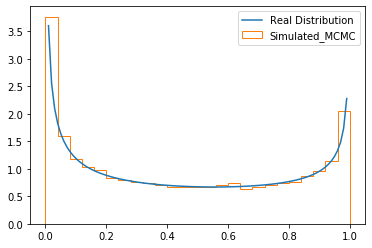

In [7]:
#M-H sampling
import random
import math
import numpy as np
from scipy.stats import norm
import scipy.special as ss
import matplotlib.pyplot as plt

def MH_sampling(n, p):
    curr = random.uniform(0, 1)
    state = []
    for i in range(0, n):
        state.append(curr)
        next_state = norm.rvs(loc=curr)
        alpha = min((p(next_state)/p(curr)),1)
        u = random.uniform(0, 1)
        if u < alpha:
            curr = next_state
    return state

# Beta分布概率密度函数
def beta(x):
    a=0.5
    b=0.6
    return (1.0 / ss.beta(a,b)) * x**(a-1) * (1-x)**(b-1)

Ly = []
Lx = []
i_list = np.mgrid[0:1:100j]
for i in i_list:
    Lx.append(i)
    Ly.append(beta(i))
    
plt.plot(Lx, Ly, label="Real Distribution")
plt.hist(MH_sampling(100000,beta),density=1,bins=25, histtype='step',label="Simulated_MCMC")
plt.legend()
plt.show()

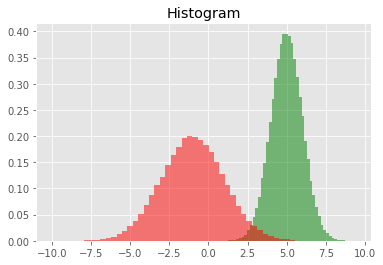

In [44]:
#Gibbs sampling
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import math
from matplotlib import pyplot as plt
plt.style.use('ggplot')
samplesource = multivariate_normal(mean = [5, -1], cov = [[1, 1], [1, 4]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt((1 - rho ** 2) * (s2**2))))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt((1 - rho ** 2) * (s1**2))))

N = 5000*20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    x = p_xgiveny(y, m1, m2, s1, s2)
    y = p_ygivenx(x, m1, m2, s1, s2)
    z = samplesource.pdf([x,y])
    x_res.append(x)
    y_res.append(y)
    z_res.append(z)

num_bins = 50
plt.hist(x_res, num_bins, density=1, facecolor='green', alpha=0.5)
plt.hist(y_res, num_bins, density=1, facecolor='red', alpha=0.5)
plt.title('Histogram')
plt.show()

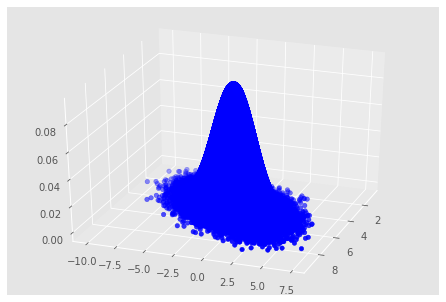

In [45]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res, y_res, z_res,marker='o', color='b')
plt.show()